# Nanodegree Engenheiro de Machine Learning
## Aprendizado Supervisionado
## Projeto: Encontrando doadores para a *CharityML*

Seja bem-vindo ao segundo projeto do Nanodegree Engenheiro de Machine Learning! Neste notebook, você receberá alguns códigos de exemplo e será seu trabalho implementar as funcionalidades adicionais necessárias para a conclusão do projeto. As seções cujo cabeçalho começa com **'Implementação'** indicam que o bloco de código posterior requer funcionalidades adicionais que você deve desenvolver. Para cada parte do projeto serão fornecidas instruções e as diretrizes da implementação estarão marcadas no bloco de código com uma expressão `'TODO'`. 
Por favor, leia cuidadosamente as instruções!

Além de implementações de código, você terá de responder questões relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão terá um cabeçalho com o termo **'Questão X'**. Leia com atenção as questões e forneça respostas completas nas caixas de texto que começam com o termo **'Resposta:'**. A submissão do seu projeto será avaliada baseada nas suas resostas para cada uma das questões além das implementações que você disponibilizar.

>**Nota:** Por favor, especifique QUAL A VERSÃO DO PYTHON utilizada por você para a submissão deste notebook. As células "Code" e "Markdown" podem ser executadas utilizando o atalho do teclado **Shift + Enter**. Além disso, as células "Markdown" podem ser editadas clicando-se duas vezes na célula.


## Iniciando

Neste projeto, você utilizará diversos algoritmos de aprendizado supervisionado para modelar com precisão a remuneração de indivíduos utilizando dados coletados no censo americano de 1994. Você escolherá o algoritmo mais adequado através dos resultados preliminares e irá otimizá-lo para modelagem dos dados. O seu objetivo com esta implementação é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000. Este tipo de tarefa pode surgir em organizações sem fins lucrativos que sobrevivem de doações. Entender a remuneração de um indivíduo pode ajudar a organização o montante mais adequado para uma solicitação de doação, ou ainda se eles realmente deveriam entrar em contato com a pessoa. Enquanto pode ser uma tarefa difícil determinar a faixa de renda de uma pesssoa de maneira direta, nós podemos inferir estes valores através de outros recursos disponíveis publicamente. 

O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income) e foi cedido por Ron Kohavi e Barry Becker, após a sua publicação no artigo _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. Você pode encontrar o artigo de Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). Os dados que investigaremos aqui possuem algumas pequenas modificações se comparados com os dados originais, como por exemplo a remoção da funcionalidade `'fnlwgt'` e a remoção de registros inconsistentes.


----
## Explorando os dados
Execute a célula de código abaixo para carregas as bibliotecas Python necessárias e carregas os dados do censo. Perceba que a última coluna deste conjunto de dados, `'income'`, será o rótulo do nosso alvo (se um indivíduo possui remuneração igual ou maior do que $50,000 anualmente). Todas as outras colunas são dados de cada indívduo na base de dados do censo.

In [15]:

''' Nome: David Manoel Vidal; E-mail: kinetics.parse@gmail.com; Cel: (16) 99222-7355; Compilado em: Python Versão 3.7.0 '''

import pandas as pd
import numpy as np
import visuals as vs

from   time import time
from   IPython.display import display
from   sklearn.preprocessing import MinMaxScaler

# diretriz para que gráficos sejam exibidos abaixo dos códigos no ambiente de programação
%matplotlib inline


# carrega DataFrame em memória
df = pd.read_csv("census.csv")

# exibe os primeiros registros do DataFrame
df.head( 10 )


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementação: Explorando os Dados

Uma investigação superficial da massa de dados determinará quantos indivíduos se enquadram em cada grupo e nos dirá sobre o percentual destes indivúdos com remuneração anual superior à \$50,000. No código abaixo, você precisará calcular o seguinte:
- O número total de registros, `'n_records'`
- O número de indivíduos com remuneração anual superior à \$50,000, `'n_greater_50k'`.
- O número de indivíduos com remuneração anual até \$50,000, `'n_at_most_50k'`.
- O percentual de indivíduos com remuneração anual superior à \$50,000, `'greater_percent'`.

** DICA: ** Você pode precisar olhar a tabela acima para entender como os registros da coluna `'income'` estão formatados.

In [16]:

# número total de registros
n_records = df.shape[0]

# número de registros com remuneração anual: superior à US$ 50,000  - OU - inferior ou igual à US$ 50,000
n_greater_50k = df.query( 'income == ">50K" ' )['income'].count()
n_at_most_50k = df.query( 'income == "<=50K" ' )['income'].count()

# percentual de indivíduos
greater_percent = ( n_greater_50k * 100 ) / n_records
at_most_percent = ( n_at_most_50k * 100 ) / n_records

# exibe resultados
print( "{} ( {:06.2f}% ) : total de registros." .format( n_records, 100 ))
print( "{} ( {:06.2f}% ) : total de indivíduos que recebem mais de US$ 50.000 anual." .format( n_greater_50k, greater_percent ))
print( "{} ( {:06.2f}% ) : total de indivíduos que recebem até US$ 50.000 anual."     .format( n_at_most_50k, at_most_percent ))


45222 ( 100.00% ) : total de registros.
11208 ( 024.78% ) : total de indivíduos que recebem mais de US$ 50.000 anual.
34014 ( 075.22% ) : total de indivíduos que recebem até US$ 50.000 anual.


** Explorando as colunas **
* **age**: contínuo. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: contínuo. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: contínuo. 
* **capital-loss**: contínuo. 
* **hours-per-week**: contínuo. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preparando os dados
Antes de que os dados possam ser utilizados como input para algoritmos de machine learning, muitas vezes eles precisam ser tratados, formatados e reestruturados — este processo é conhecido como **pré-processamento**. Felizmente neste conjunto de dados não existem registros inconsistentes para tratamento, porém algumas colunas precisam ser ajustadas. Este pré-processamento pode ajudar muito com o resultado e poder de predição de quase todos os algoritmos de aprendizado.

### Transformando os principais desvios das colunas contínuas
Um conjunto de dados pode conter ao menos uma coluna onde os valores tendem a se próximar para um único número, mas também podem conter registros com o mesmo atributo contendo um valor muito maior ou muito menor do que esta tendência. Algoritmos podem ser sensíveis para estes casos de distribuição de valores e este fator pode prejudicar sua performance se a distribuição não estiver normalizada de maneira adequada. Com o conjunto de dados do censo, dois atributos se encaixam nesta descrição: '`capital-gain'` e `'capital-loss'`.

Execute o código da célula abaixo para plotar um histograma destes dois atributos. Repare na distribuição destes valores.

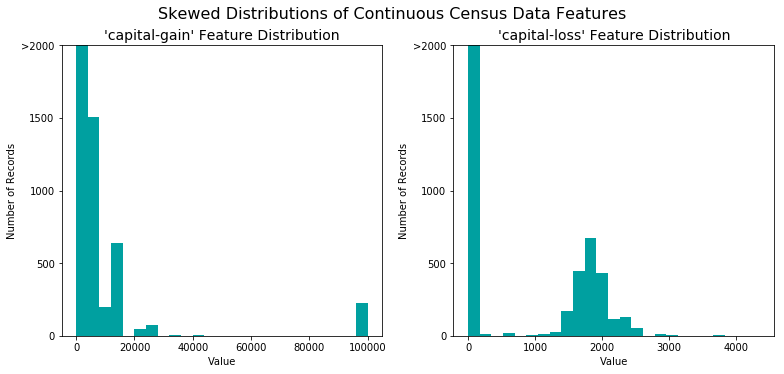

In [17]:

# dividindo os dados entre features e coluna alvo
income_raw   =  df['income']
features_raw =  df.drop('income', axis = 1)

# visualizando principais desvios das colunas contínuas entre os dados
vs.distribution( df )


Para atributos com distribuição muito distorcida, tais como `'capital-gain'` e `'capital-loss'`, é uma prática comum aplicar uma <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transformação logarítmica</a> nos dados para que os valores muito grandes e muito pequenos não afetem a performance do algoritmo de aprendizado. Usar a transformação logarítmica reduz significativamente os limites dos valores afetados pelos outliers (valores muito grandes ou muito pequenos). Deve-se tomar cuidado ao aplicar esta transformação, poir o logaritmo de `0` é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de `0` para aplicar o logaritmo adequadamente.

Execute o código da célula abaixo para realizar a transformação nos dados e visualizar os resultados. De novo, note os valores limite e como os valores estão distribuídos.

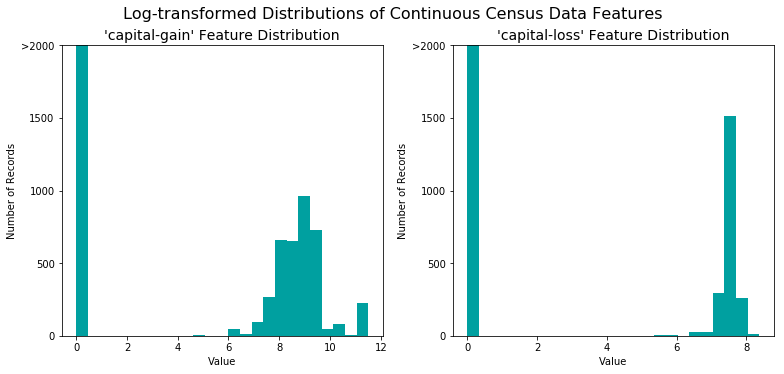

In [18]:

# aplica transformação de log nos registros distorcidos
skewed = [ 'capital-gain', 'capital-loss' ]
features_log_transformed = pd.DataFrame( data=features_raw )
features_log_transformed[ skewed ] = features_raw[ skewed ].apply( lambda x: np.log( x + 1 )) 

# visualiza novas distribuições após a transformação
vs.distribution( features_log_transformed, transformed = True )


### Normalizando atributos numéricos
Além das transformações em atributos distorcidos, é uma boa prática comum realizar algum tipo de adaptação de escala nos atributos numéricos. Ajustar a escala nos dados não modifica o formato da distribuição de cada coluna (tais como `'capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada atributo será tratado com o mesmo peso durante a aplicação de aprendizado supervisionado. Note que uma vez aplicada a escala, a observação dos dados não terá o significado original, como exemplificado abaixo.

Execute o código da célula abaixo para normalizar cada atributo numérico, nós usaremos ara isso a [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [19]:

# inicializa um aplicador de escala e aplica em seguida aos atributos
scaler = MinMaxScaler( ) # default=( 0, 1 )

# especificacolunas que serão aplicadas o fator de escala
numerical = [ 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week' ]

# normaliza registros, aplicando fator de escala nos dados logaritmos
features_log_minmax_transform = pd.DataFrame( data=features_log_transformed )
features_log_minmax_transform[numerical] = scaler.fit_transform( features_log_transformed[ numerical ] )

# exibe os primeiros registros tendo sido normalizados
display( features_log_minmax_transform.head( 20 ))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.500000,United-States
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.397959,United-States


### Implementação: Pré-processamento dos dados

A partir da tabela em **Explorando os dados** acima, nós podemos observar que existem diversos atributos não-numéricos para cada registro. Usualmente, algoritmos de aprendizado esperam que os inputs sejam numéricos, o que requer que os atributos não numéricos (chamados de *variáveis de categoria*) sejam convertidos. Uma maneira popular de converter as variáveis de categoria é utilizar a estratégia **one-hot encoding**. Esta estratégia cria uma variável para cada categoria possível de cada atributo não numérico. Por exemplo, assuma que `algumAtributo` possuí três valores possíveis: `A`, `B`, ou `C`. Nós então transformamos este atributo em três novos atributos: `algumAtributo_A`, `algumAtributo_B` e `algumAtributo_C`.


|   | algumAtributo |                    | algumAtributo_A | algumAtributo_B | algumAtributo_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Além disso, assim como os atributos não-numéricos, precisaremos converter a coluna alvo não-numérica, `'income'`, para valores numéricos para que o algoritmo de aprendizado funcione. Uma vez que só existem duas categorias possíveis para esta coluna ("<=50K" e ">50K"), nós podemos evitar a utilização do one-hot encoding e simplesmente transformar estas duas categorias para `0` e `1`, respectivamente. No trecho de código abaixo, você precisará implementar o seguinte:
 - Utilizar [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para realizar o one-hot encoding nos dados da `'features_log_minmax_transform'`.
 - Converter a coluna alvo `'income_raw'` para re.
   - Transforme os registros com "<=50K" para `0` e os registros com ">50K" para `1`.

In [20]:

# aplica técnica one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies( )
features_final = pd.get_dummies( features_log_minmax_transform )

# realiza o encode da coluna 'income_raw' para valores numéricos
income = income_raw.map( { '<=50K' : 0, '>50K' : 1 } )

# exibe o número de colunas depois do one-hot encoding
encoded = list( features_final.columns )
print( "{} : total de colunas pós técnica one-hot encoding".format( len( encoded ) ))

# exibe as colunas após o encode
print( encoded )


103 : total de colunas pós técnica one-hot encoding
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occu

### Embaralhar e dividir os dados
Agora todas as _variáveis de categoria_ foram convertidas em atributos numéricos e todos os atributos numéricos foram normalizados. Como sempre, nós agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.

Execute o código da célula abaixo para realizar divisão.

In [21]:

# importar train_test_split
from sklearn.model_selection import train_test_split

# dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split( features_final, income, test_size = 0.2, random_state = 0 )

# exibe os resultados da função split
print( "{:0>5} : total de amostras conjunto de treinamento." .format( X_train.shape[ 0 ]))
print( "{:0>5} : total de amostras conjunto de teste."       .format( X_test.shape[ 0  ]))


36177 : total de amostras conjunto de treinamento.
09045 : total de amostras conjunto de teste.


----
## Avaliando a performance do modelo
Nesta seção nós investigaremos quatro algoritmos diferentes e determinaremos qual deles é melhor para a modelagem dos dados. Três destes algoritmos serão algoritmos de aprendizado supervisionado de sua escolha e o quarto algoritmo é conhecido como *naive predictor*.

### Métricas e o Naive predictor

*CharityML*, equpada com sua pesquisa, sabe que os indivíduos que fazem mais do que \$50,000 possuem maior probabilidade de doar para a sua campanha de caridade. Por conta disto, a *CharityML* está particularmente interessada em predizer com acurácia quais indivíduos possuem remuneração acima de \$50,000. Parece que utilizar **acurácia (accuracy)** como uma métrica para avaliar a performance de um modelo é um parâmetro adequado. Além disso, identificar alguém que *não possui* remuneração acima de \$50,000 como alguém que recebe acima deste valor seria ruim para a *CharityML*, uma vez que eles estão procurando por indivíduos que desejam doar. Com isso, a habilidade do modelo em predizer com preisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Nós podemos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, maior ênfase é atribuída para a variável precision. Isso é chamado de **F$_{0.5}$ score** (ou F-score, simplificando).

Analisando a distribuição de classes (aqueles que possuem remuneração até \$50,000 e aqueles que possuem remuneração superior), fica claro que a maioria dos indivíduos não possui remuneração acima de \$50,000. Isto pode ter grande impacto na **acurácia (accuracy)**, uma vez que nós poderíamos simplesmente dizer *"Esta pessoa não possui remuneração acima de \$50,000"* e estar certos em boa parte das vezes, sem ao menos olhar os dados! Fazer este tipo de afirmação seria chamado de **naive**, uma vez que não consideramos nenhuma informação para balisar este argumento. É sempre importante considerar a *naive prediction* para seu conjunto de dados, para ajudar a estabelecer um benchmark para análise da performance dos modelos. Com isso, sabemos que utilizar a naive prediction não traria resultado algum: Se a predição apontasse que todas as pessoas possuem remuneração inferior à \$50,000, a *CharityML* não identificaria ninguém como potencial doador. 



#### Nota: Revisando: accuracy, precision e recall

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

### Questão 1 - Performance do Naive Predictor
* Se escolhessemos um modelo que sempre prediz que um indivíduo possui remuneração acima de $50,000, qual seria a accuracy e o F-score considerando este conjunto de dados? Você deverá utilizar o código da célula abaixo e atribuir os seus resultados para as variáveis `'accuracy'` e `'fscore'` que serão usadas posteriormente.

** Por favor, note ** que o propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comportaria. No mundo real, idealmente o seu modelo de base será o resultado de um modelo anterior ou poderia ser baseado em um paper no qual você se basearia para melhorar. Quando não houver qualquer benchmark de modelo, utilizar um naive predictor será melhor do que uma escolha aleatória.

** DICA: ** 

* Quando temos um modelo que sempre prediz '1' (e.x o indivíduo possui remuneração superior à 50k) então nosso modelo não terá Verdadeiros Negativos ou Falso Negativos, pois nós não estaremos afirmando que qualquer dos valores é negativo (ou '0') durante a predição. Com isso, nossa accuracy neste caso se torna o mesmo valor da precision (Verdadeiros positivos/ (Verdadeiros positivos + Falso positivos)) pois cada predição que fizemos com o valor '1' que deveria ter o valor '0' se torna um falso positivo; nosso denominador neste caso é o número total de registros.
* Nossa pontuação de Recall(Verdadeiros positivos/(Verdadeiros Positivos + Falsos negativos)) será 1 pois não teremos Falsos negativos.

In [29]:
'''
VP = np.sum( income ) # valores 1
FP = income.count(  ) # valores 0

# Sem predições negativas para o caso naive
VN = 0 
FN = 0
'''

VP = np.sum( income )
FP = income.count() - VP
VN = 0
FN = 0

print( '{} : total de registros' .format( income.count()))
print( '{} : total de registros acima de 50k US$' .format( VP ))
print( '{} : total de registros abaixo de 50k US$ \n' .format( FP ))

accuracy  = ( VP + VN ) / ( VP + VN + FP + FN )
precision = ( VP ) / ( VP + FP )
recall    = ( VP ) / ( VP + FN )
β = ( 0.5 * 0.5 )

# calcular o F-score utilizando a fórmula acima para o beta = 0.5 e os valores corretos de precision e recall.
fscore = ( 1 + β ) * ( precision * recall ) / (( β * precision ) + recall )

# exibir os resultados 
print( "NAIVE PREDICTOR \n   {:3.4f} : Acurácia, \n   {:3.4f} : F1-Score.".format( accuracy, fscore ))


45222 : total de registros
11208 : total de registros acima de 50k US$
34014 : total de registros abaixo de 50k US$ 

NAIVE PREDICTOR 
   0.2478 : Acurácia, 
   0.2917 : F1-Score.


###  Modelos de Aprendizado Supervisionado
**Estes são alguns dos modelos de aprendizado supervisionado disponíveis em** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees (Árvores de decisão)
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Questão 2 - Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para este problema que você irá testar nos dados do censo. Para cada modelo escolhido

- Descreva uma situação do mundo real onde este modelo pode ser utilizado. 
- Quais são as vantageNs da utilização deste modelo; quando ele performa bem?
- Quais são as fraqueZas do modelo; quando ele performa mal?
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?

** DICA: ** Estruture sua resposta no mesmo formato acima, com 4 partes para cada um dos modelos que você escolher. Por favor, inclua referências em cada uma das respostas.

### Resp. 2:


### Regressão Logística (em inglês Logistic Regression):
- Exemplo de aplicação: útil para analisar preços de um imóvel, com base em suas características.

- Vantagens deste modelo: 1 - Funciona bem com dados os quais assumam um comportamento linear e “previsível”. 2 - Permite determinar valores que sigam uma tendência linear. 3 - Permite classificar (separar) valores, os quais estejam delimitados por uma margem (linha imaginária). 4 - Útil para análises de mercado, análises financeiras, as quais baseiam-se em estatísticas e comumente possuem oscilações (erros) mesmo pelos profissionais mais experts em determinado assunto.

- Fraquezas deste modelo: 1 - Na vida poucos são os exemplos práticos que assumem comportamento puramente linear, a maioria das coisas assume comportamento de curva, em especial a curva S (cresce devagar, acentua, por fim para de crescer). 2 - Em casos em que apresentem muitos Outliers a regressão tende a se tornar inviável. Assim como a classificação de dados que não sigam comportamento linear torna-se falha, uma vez que são na maioria das vezes aleatória, disperso e imprevisíveis.

- Este modelo pode ser útil neste exemplo porque: pode prever com base nos atributos de uma pessoa a sua renda, consequentemente determinando se ela é ou não um possível doador.


### Árvores de decisão (em inglês Decision Trees):
- Exemplo de aplicação: útil para analisar perfis de pessoas para se relacionar, com base nos perfis que foram no passado combinados, receberam curtidas.

- Vantagens deste modelo: 1 - Permite realizar análises complexas, uma vez que diversos critérios são combinados para determinar um resultado final. 2 - Sua forma de lidar com o conhecimento é simples, intuitiva, conceitual e puramente lógica. 3 - Permite abstrair diferentes cenários em uma árvore a qual determinará diferentes caminhos possíveis, caso a caso.

- Fraquezas deste modelo: 1 - Torna-se inviável para lidar com grande quantidade de dados, dispersos e diferentes entre si, vindo a se tornar complexa e falha na generalização. 2 - Possui tendência a singularidade, vindo a tratar cada dado como sendo único. Tornando-se incapaz de inferir de forma simples soluções mais simples. 3 - Quando tende a singularidade, gera estruturas complexas, extensas e confusas. 4 - Sua complexidade pode crescer de forma exponencial, a medida em que lida com diferentes cenários, diferentes tipos de dados. 5 - Quanto maior a estrutura para se determinar uma resposta, maior tende a ser seu processamento e seu tempo de resposta.

- Este modelo pode ser útil neste exemplo porque: pode combinar diferentes critérios para analisar a renda de uma pessoa, com isso determinando seu "perfil" de doador.


### Máquina Vetor de Suportes (em inglês Support Vector Machines, SVM):
- Exemplo de aplicação: útil para análises onde os dados possam se apresentar “bagunçados” são as melhores aplicações do modelo. Como se trata de um algoritmo robusto sua aplicabilidade varia de acordo com suas características. Todavia, de modo geral são úteis para categorizar textos, análise de imagens (reconhecimento, reconstrução) e em Bioinformática.

- Vantagens deste modelo: 1 - Permite classificar dados, criar margens que os separem, delimitando-os em regiões melhor que outros algoritmos. 2 - Estabelece tanto linhas, quanto curvas na classificação ou mensuração de fatos. 3 - Lida bem com dados dispersos, aleatórios, confusos e/ou robustos (densos). 4 - Tolera bem dados com múltiplas dimensões (dados de entrada em conjunto). 5 - O processo de classificação é rápido. 6 - O modelo em si se adapta bem a dados que apresentem ruído, contando que seus hiperparâmetros sejam configurados corretamente.

- Fraquezas deste modelo: 1 - Apresenta forte sensibilidade na escolha de parâmetros para sua análise e performance de trabalho. 2 - A partir de determinada quantidade de dados, o tempo de treinamento pode se tornar longo. Pode apresentar queda de performance (atrasos na resposta).

- Este modelo pode ser útil neste exemplo porque: é capaz de determinar diferentes perfis de pessoas doadores quando representados em um gráfico. Teríamos regiões expressas em "doadores" e "não doares".



### Implementação - Criando um Pipeline de Treinamento e Predição
Para avaliar adequadamente a performance de cada um dos modelos que você escolheu é importante que você crie um pipeline de treinamento e predição que te permite de maneira rápida e eficiente treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste. Sua implementação aqui será utilizada na próxima seção. No bloco de código abaixo, você precisará implementar o seguinte:
 - Importar `fbeta_score` e `accuracy_score` de [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Adapte o algoritmo para os dados de treinamento e registre o tempo de treinamento. 
 - Realize predições nos dados de teste `X_test`, e também nos 300 primeiros pontos de treinamento `X_train[:300]`.
   - Registre o tempo total de predição. 
 - Calcule a acurácia tanto para o conjundo de dados de treino quanto para o conjunto de testes.
 - Calcule o F-score para os dois conjuntos de dados: treino e testes. 
   - Garanta que você configurou o parâmetro `beta`! 

In [12]:

# importa biblioteca que responsável pelas métricas de um algoritmo
import sklearn.metrics as mt


# cria função para automatizar as tarefas
def train_predict( learner, sample_size, X_train, y_train, X_test, y_true ): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_true: income testing set
       - y_predict: income predict ( predictions_train // predictions_test )
    '''
    results = {}
    
    
    # realiza o treinamento do algoritmo modelo
    start = time() 
    learner.fit( X_train[ : sample_size ], y_train[ : sample_size ] )
    end = time()     
    
    # calcula o tempo de treinamento
    results['train_time'] = round( end - start, 3)
    

    
    # Get the predictions on the test set(X_test), then get predictions on the first 300 training samples(X_train) using .predict()
    start = time()
    predictions_train = learner.predict( X_train[ : sample_size ] )
    predictions_test = learner.predict( X_test )    
    end = time()
    
    # calcula o tempo total de predição
    results['pred_time'] = round( end - start, 3)

    
    
    # calcula a acurácia do algoritmo modelo para os primeiros 300 registros
    results['acc_train'] = mt.accuracy_score( y_train[ :300 ], predictions_train[ :300 ] )
    
    # calcula a acurácia do algoritmo modelo
    results['acc_test'] =  mt.accuracy_score( y_test, predictions_test )
    
    
    
    # calcula o F-score do algoritmo modelo
    results['f_train'] = mt.f1_score( y_train[ :300 ], predictions_train[ :300 ] )
        
    # calcula o F-score do algoritmo modelo
    results['f_test'] = mt.f1_score( y_true, predictions_test )
    
    
    
    # finaliza & retorna resultados
    print("{} trained on {} samples.".format( learner.__class__.__name__, sample_size ))
    return results



### Implementação: Validação inicial do modelo
No código da célular, você precisará implementar o seguinte:
- Importar os três modelos de aprendizado supervisionado que você escolheu na seção anterior 
- Inicializar os três modelos e armazená-los em `'clf_A'`, `'clf_B'`, e `'clf_C'`. 
  - Utilize um `'random_state'` para cada modelo que você utilizar, caso seja fornecido.
  - **Nota:** Utilize as configurações padrão para cada modelo - você otimizará um modelo específico em uma seção posterior
- Calcule o número de registros equivalentes à 1%, 10%, e 100% dos dados de treinamento.
  - Armazene estes valores em `'samples_1'`, `'samples_10'`, e `'samples_100'` respectivamente.

**Nota:** Dependendo do algoritmo de sua escolha, a implementação abaixo pode demorar algum tempo para executar!

LogisticRegression trained on 362 samples.
LogisticRegression trained on 3618 samples.
LogisticRegression trained on 36177 samples.
DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 362 samples.
SVC trained on 3618 samples.
SVC trained on 36177 samples.


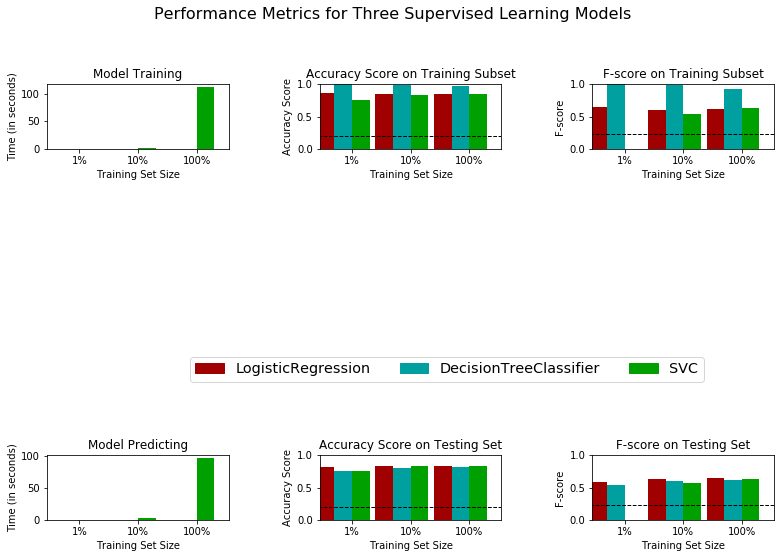

In [13]:

# importa biblioteca algoritmo modelo Regressão Logística
from sklearn.linear_model import LogisticRegression

# importa biblioteca algoritmo modelo Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# importa biblioteca algoritmo modelo Máquina Vetor de Suporte
from sklearn import svm


# inicializa os modelos escolhidos
clf_A = LogisticRegression( random_state=42 )
clf_B = DecisionTreeClassifier( random_state=42 )
clf_C = svm.SVC( random_state=42 )


# TODO: Calcule o número de amostras para 1%, 10%, e 100% dos dados de treinamento
# HINT: samples_100 é todo o conjunto de treinamento e.x.: len(y_train)
# HINT: samples_10 é 10% de samples_100
# HINT: samples_1 é 1% de samples_100

# 36177 : registros = 100% ( total de amostras conjunto de treinamento ).
# 03618 : registros = 010%
# 00362 : registros = 001%

samples_1 = 362
samples_10 = 3618
samples_100 = 36177

# coleta os resultados dos algoritmos de aprendizado
results = {}
for clf in [ clf_A, clf_B, clf_C ]:
    clf_name = clf.__class__.__name__
    results[ clf_name ] = {}
    for pI, samples in enumerate( [ samples_1, samples_10, samples_100 ] ):
        results[ clf_name ][ pI ] = train_predict( clf, samples, X_train, y_train, X_test, y_test )

        
# visualiza métricas do algoritmo de aprendizagem supervisionado
vs.evaluate( results, accuracy, fscore )


----
## Melhorando os resultados
Nesta seção final, você irá escolher o melhor entre os três modelos de aprendizado supervisionado para utilizar nos dados dos estudantes. Você irá então realizar uma busca grid para otimização em todo o conjunto de dados de treino (`X_train` e `y_train`) fazendo o tuning de pelo menos um parâmetro para melhorar o F-score anterior do modelo.

### Questão 3 - Escolhendo o melhor modelo

* Baseado na validação anterior, em um ou dois parágrafos explique para a *CharityML* qual dos três modelos você acredita ser o mais apropriado para a tarefa de identificar indivíduos com remuneração anual superior à \$50,000.  

** DICA: ** 
Analise o gráfico do canto inferior esquerdo da célula acima(a visualização criada através do comando `vs.evaluate(results, accuracy, fscore)`) e verifique o F score para o conjunto de testes quando 100% do conjunto de treino é utilizado. Qual modelo possui o maior score? Sua resposta deve abranger os seguintes pontos:
* métricas - F score no conjunto de testes quando 100% dos dados de treino são utilizados, 
* tempo de predição/treinamento 
* a adequação do algoritmo para este conjunto de dados.

### Resp.: 
Com base neste cenário, onde os três algoritmos modelos apresentam variações de performance - E - estão mal configurados, a Regressão Logística em si seria o melhor o modelo a ser adotado, uma vez que apresenta as melhores métricas de performance. Todavia escolhi a Árvore de Decisão, a ser adotada na solução, uma vez que apresenta performance aceitável (equiparável a seu concorrente Máquina Vetor de Suporte e pouco inferior a Regressão Logística), tempo de processamento (predição & treinamento muito reduzido quando comparado a Máquina Vetor de Suporte) coerentes. O algoritmo permite se adequar perfeitamente ao cenário em questão: combinação de critérios para classificar o perfil de possíveis doadores na base de dados.


### Questão 4 - Descrevendo o modelo nos termos de Layman
 
* Em um ou dois parágrafos, explique para a *CharityML*, nos termos de layman, como o modelo final escolhido deveria funcionar. Garanta que você está descrevendo as principais vantagens do modelo, tais como o modo de treinar o modelo e como o modelo realiza a predição. Evite a utilização de jargões matemáticos avançados, como por exemplo a descrição de equações. 

** DICA: **

Quando estiver explicando seu modelo, cite as fontes externas utilizadas, caso utilize alguma.

### Resp.:

Árvores de Decisão são estruturas lógicas, as quais imitam a ideia de uma árvore. Permitem analisar dados, onde temos a raíz principal e suas ramificações. Nestas estruturas é possível analisar padrões, o que os dados possuem em comum e o que os diferencia entre si. A cada ramificação os dados são analisados novamente e diferenciados, com base em seus critérios (ramificações). Apresentam tempo de execução ágil, lidam bem com diferentes conjuntos de dados, permitem combinar diferentes critérios na busca por uma solução.

Assim como na vida temos um caminho que nos leva a algum lugar e, este lugar nos leva a outros caminhos, a árvore de decisão permite que nossas decisões possam ser "replicadas" em suas estrutura, apresentando diferentes caminhos, diferentes decisões que podem ser tomadas, cada caminho tendo suas diferenças entre si, nos levando a algum lugar diferente do que nos encontramos. São úteis na analise de dados, uma vez que são fáceis de serem construídas, implementadas, compreendidas e por imitarem o comportamento da vida real, onde temos uma origem, suas derivações e cada caminho nos leva a algum lugar, onde não podemos percorrer dois caminhos ao mesmo tempo.


### Implementação: Tuning do modelo
Refine o modelo escolhido. Utilize uma busca grid (`GridSearchCV`) com pleo menos um parâmetro importante refinado com pelo menos 3 valores diferentes. Você precisará utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importar [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicializar o classificador escolhido por você e armazená-lo em `clf`.
 - Configurar um `random_state` se houver um disponível para o mesmo estado que você configurou anteriormente.
- Criar um dicionário dos parâmetros que você quer otimizar para o modelo escolhido.
 - Exemplo: `parâmetro = {'parâmetro' : [lista de valores]}`.
 - **Nota:** Evite otimizar o parâmetro `max_features` se este parâmetro estiver disponível! 
- Utilize `make_scorer` para criar um objeto de pontuação `fbeta_score` (com $\beta = 0.5$).
- Realize a busca gride no classificador `clf` utilizando o `'scorer'` e armazene-o na variável `grid_obj`.   
- Adeque o objeto da busca grid aos dados de treino (`X_train`, `y_train`) e armazene em `grid_fit`.

**Nota:** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para executar! 

In [12]:
# importa biblioteca que responsável pela técnica GridSearch ( Busca em Grade )
import sklearn.model_selection as modSel


# inicializa Árvore de Decisão
ml_Mod = DecisionTreeClassifier()


# cria um dicionário (simples) contendo listas internamente, cada qual expressando um parâmetro
# cada parâmetro contém internamente suas possíveis configurações as quais serão exploradas
parameters = { 'max_depth' : [15,16,17,18,19,20,21,22,23], 'min_samples_leaf' : [15,16,17,18,19,20,21,22,23], 'min_samples_split' : [2,3,4,5,6,7,8,9] }


# cria objeto f_beta_score scoring
scorer = mt.make_scorer( mt.f1_score )


# cria um objeto GridSearch, configurando-o de acordo com o cenário 
# algoritmo de Machine Learning, parâmetros a serem configurados e scoring de pontuação.
ml_GridObj = modSel.GridSearchCV( ml_Mod, parameters, scoring=scorer )


# treina o objeto GridSearch, buscando os melhores parâmetros internamente
ml_GridObj_fit = ml_GridObj.fit( X_train, y_train )


# retorna os melhores parâmetros encontrados
ml_ModBest = ml_GridObj_fit.best_estimator_


# faz previsões usando o novo modelo
predictions = ( ml_Mod.fit( X_train, y_train )).predict( X_test )
best_predictions = ml_ModBest.predict( X_test )



# Reportar os scores de antes e de depois
print( "Unoptimized model\n------" )
print( "Accuracy score on testing data: {:.4f}".format( mt.accuracy_score( y_test, predictions )))
print( "F-score on testing data: {:.4f}".format( mt.fbeta_score( y_test, predictions, beta = 0.5 )))

print( "\nOptimized Model\n------")
print( "Final accuracy score on the testing data: {:.4f}".format( mt.accuracy_score( y_test, best_predictions )))
print( "Final F-score on the testing data: {:.4f}".format( mt.fbeta_score( y_test, best_predictions, beta = 0.5 )))

ml_ModBest

Unoptimized model
------
Accuracy score on testing data: 0.8175
F-score on testing data: 0.6256

Optimized Model
------
Final accuracy score on the testing data: 0.8546
Final F-score on the testing data: 0.7161


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Questão 5 - Validação final do modelo

* Qual é a accuracy e o F-score do modelo otimizado utilizando os dados de testes?
* Estes scores são melhores ou piores do que o modelo antes da otimização? 
* Como os resultados do modelo otimizado se comparam aos benchmarks do naive predictor que você encontrou na **Questão 1**?_

**Nota:** Preencha a tabela abaixo com seus resultados e então responda as questões no campo **Resposta** 

#### Resultados:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8175     |        0.8546   |
| F-score        |        0.6256     |        0.7161   |


### Resp.:

Estes Scores são melhores, comparados ao modelo de benchmark do Naive Predictor. Apresenta um valor acima de 0.70, o que é muito bom. Apesar de ter certa margem de erro, o algoritmo foi capaz de criar um modelo o qual generaliza tendências do mundo real, usando dados reais.


----
## Importância dos atributos

Uma tarefa importante quando realizamos aprendizado supervisionado em um conjunto de dados como os dados do censo que estudamos aqui é determinar quais atributos fornecem maior poder de predição. Focando no relacionamento entre alguns poucos atributos mais importantes e na label alvo nós simplificamos muito o nosso entendimento do fenômeno, que é a coisa mais importante a se fazer. No caso deste projeto, isso significa que nós queremos identificar um pequeno número de atributos que possuem maior chance de predizer se um indivíduo possui renda anual superior à \$50,000.

Escolha um classificador da scikit-learn (e.x.: adaboost, random forests) que possua o atributo `feature_importance_`, que é uma função que calcula o ranking de importância dos atributos de acordo com o classificador escolhido. Na próxima célula python ajuste este classificador para o conjunto de treinamento e utilize este atributo para determinar os 5 atributos mais importantes do conjunto de dados do censo.

### Questão 6 - Observação da Relevância dos Atributos
Quando **Exploramos os dados**, vimos que existem treze atributos disponíveis para cada registro nos dados do censo. Destes treze atributos, quais os 5 atributos que você acredita que são os mais importantes para predição e em que ordem você os ranquearia? Por quê?

### Resp.: 

"O seu objetivo com esta implementação é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000." Afim de atender ao objetivo de determinar a renda de uma pessoa, usando somente 5 atributos, escolheria estes, na seguinte ordem:

1 - ganho de capital (em inglês capital-gain), quanto maior é a renda de uma pessoa maior tende a ser seu padrão de vida, consequentemente as chances de dispor de algum valor para doações são maiores;

2 - perda de capital (em inglês capital-loss), quanto maior tende a ser a perda de capital de uma pessoa, menores tendem a ser as chances desta abrir mão de algum valor para doações;

3 - ocupação (em inglês ocupação), embora o trabalho determine a renda de uma pessoa, algumas classes de trabalho podem apresentar maiores tendência de as pessoas serem doadoras do que outras, uma vez que isso envolve a forma com a qual a pessoa atua no mundo, pensa, é ou se comporta. Em outras palavras remete de forma indireta a empatia que uma pessoa pode apresentar na vida real;

4 - idade (em inglês age), embora não seja conclusivo, pessoas de maior idade e pessoas mais jovens tendem a ser solidárias, muito embora pessoas de maior idade possuam renda, ao passo que pessoas muito jovens estão a estruturar suas vidas. Esse atributo pode inferir na renda de uma pessoa, se levarmos em conta que nos profissionalizamos, amadurecemos e adquirimo experiência de mercado ao longo dos anos, por consequencia isso tende a refletir em nossa renda;

5 - país de origem (em inglês native-country), cada país tem sua cultura e isso tende a refletir nas gerações de sua sociedade, alguns países tendem a ser mais solidários do que outros, assim como alguns países tendem a ser mais emotivos ou frios, mais desenvolvidos ou subdesenvolvidos, ou ainda tenham um padrão de vida, uma educação acima ou abaixo da média mundial, consequentemente isso impacta direta ou indiretamente na renda e/ou na possibilidade de a pessoa ser um possível doador em potencial;

Estes cinco atributos listados trazem consigo cada qual seu significado, embora não seja uma regra, combinados podem inferir na renda e no perfil de possíveis doadores. Talvez outros atributos se fação necessários a um modelo mais preciso, como número de dependentes familiares, padrão de vida, empatia, escolaridade, localização, partido político, nível de estudo, saúde mental, saúde física, crenças religiosas, dentre outros. Cada ser humano é "único", tais atributos quando combinados podem determinar padrões, ficando mais claro não somente a renda de uma pessoa, mas seu estilo de vida, sua qualidade de vida, seu padrão de vida e sua forma de pensar, bem como interagir com o mundo. Derterminando consequentemente sua renda e seu possível perfil de doador.

Importante ressaltar que não existem atributos mais ou menos importantes, o que existe é a combinação de atributos na busca de determinar possíveis padrões (personalidade, características de pessoas, mentalidade, etc).



### Implementação - Extraindo a importância do atributo
Escolha um algoritmo de aprendizado supervisionado da `sciki-learn` que possui o atributo `feature_importance_` disponível. Este atributo é uma função que ranqueia a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido.

Na célula de código abaixo, você precisará implementar o seguinte:
 - Importar um modelo de aprendizado supervisionado da sklearn se este for diferente dos três usados anteriormente. 
 - Treinar o modelo supervisionado com todo o conjunto de treinamento.
 - Extrair a importância dos atributos utilizando `'.feature_importances_'`.

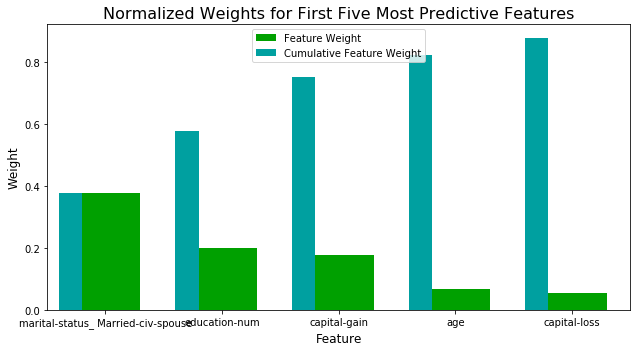

In [13]:
# extrai a importância dos atributos utilizando .feature_importances_ da Árvore de Decisão 
importances = ml_ModBest.feature_importances_ 

# plota o gráfico
vs.feature_plot( importances, X_train, y_train )

### Questão 7 - Extraindo importância dos atributos

Observe a visualização criada acima que exibe os cinco atributos mais relevantes para predizer se um indivíduo possui remuneração igual ou superior à \$50,000 por ano.

* Como estes cinco atributos se comparam com os 5 atributos que você discutiu na **Questão 6**? 
* Se você estivesse próximo da mesma resposta, como esta visualização confirma o seu raciocínio? 
* Se você não estava próximo, por que você acha que estes atributos são mais relevantes? 

### Resp.:

Ganho de capital (em inglês capital-gain), perda de capital (em inglês capital-loss) e a idade (em inglês age) vão de encontro com meu palpite sobre o cenário atual. Os demais atributos estado civil (em inglês marital-status) e ano de escolaridade (education-num) são atributos complementares conforme destacado em "talvez outros atirbutos se fação necessários a um modelo mais preciso".

### Selecionando atributos

Como um modelo performa se nós só utilizamos um subconjunto de todos os atributos disponíveis nos dados? Com menos atributos necessários para treinar, a expectativa é que o treinamento e a predição sejam executados em um tempo muito menor — com o custo da redução nas métricas de performance. A partir da visualização acima, nós vemos que os cinco atributos mais importantes contribuem para mais de 50% da importância de **todos** os atributos presentes nos dados. Isto indica que nós podemos tentar *reduzir os atributos* e simplificar a informação necessária para o modelo aprender. O código abaixo utilizará o mesmo modelo otimizado que você encontrou anteriormente e treinará o modelo com o mesmo conjunto de dados de treinamento, porém apenas com *os cinco atributos mais importantes*

In [15]:
# importa a função clonar um modelo
from sklearn.base import clone

# Reduzir a quantidade de atributos
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Treinar o melhor modelo encontrado com a busca grid anterior
clf = (clone( ml_ModBest )).fit( X_train_reduced, y_train )

# Fazer novas predições
reduced_predictions = clf.predict( X_test_reduced )

# Reportar os scores do modelo final utilizando as duas versões dos dados.
print( "Final Model trained on full data\n------" )
print( "Accuracy on testing data: {:.4f}".format( mt.accuracy_score( y_test, best_predictions )))
print( "F-score on testing data: {:.4f}" .format( mt.fbeta_score( y_test, best_predictions, beta = 0.5 )))

print( "\nFinal Model trained on reduced data\n------")
print( "Accuracy on testing data: {:.4f}".format( mt.accuracy_score( y_test, reduced_predictions )))
print( "F-score on testing data: {:.4f}". format( mt.fbeta_score( y_test, reduced_predictions, beta = 0.5 )))

Final Model trained on full data
------
Accuracy on testing data: 0.8546
F-score on testing data: 0.7161

Final Model trained on reduced data
------
Accuracy on testing data: 0.8509
F-score on testing data: 0.7074


### Questão 8 - Efeitos da seleção de atributos

* Como o F-score do modelo final e o accuracy score do conjunto de dados reduzido utilizando apenas cinco atributos se compara aos mesmos indicadores utilizando todos os atributos? 
* Se o tempo de treinamento é uma variável importante, você consideraria utilizar os dados enxutos como seu conjunto de treinamento? 


### Resp.: 
O F1 Score e a acurácia do modelo reduzido se compara relativamente igual ao modelo com todos os atributos. Em termos de validação de performance ambos os modelos (reduzido Vs completo) são iguais, porém em termos de tempo, o modelo reduzido produz respostas mais ágil o que o torna melhor quando comparado ao modelo completo, para aplicações práticas no dia a dia.

> **Nota**: Uma vez que você tenha concluído toda a implementação de código e respondido cada uma das questões acima, você poderá finalizar o seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima navegando para 
**File -> Download as -> HTML (.html)**. Inclua este documento junto do seu notebook como sua submissão.